In [24]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
#Visualizing 3D Graphs
import seaborn as sns



In [25]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
#Change the directory to Machine-Learning folder
%cd /content/drive/My Drive/Colab Notebooks/Machine-Learning/

/content/drive/My Drive/Colab Notebooks/Machine-Learning


In [27]:
#"\" is used to divide long code into multiple lines
%cd /content/drive/My Drive/Colab Notebooks/Machine-Learning/

/content/drive/My Drive/Colab Notebooks/Machine-Learning


In [28]:
#Load the train and test dataset From Google Drive

data = pd.read_csv('./deals.csv', header=None, names=['test1', 'test2', 'Admitted'])
test_data = pd.read_csv('./deals2.csv' , header=None, names=['test1', 'test2', 'Admitted'])


In [29]:
# shape of the training dataset
print('Shape of training data :',data.shape)
data.head()

Shape of training data : (79, 3)


,test1,test2,Admitted
0,34.6237,78.0247,0
1,35.8474,43.8950,0
2,45.0833,72.9022,0
3,95.8616,56.3164,0
4,75.0137,38.2253,0


In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
test1,79.0,66.275589,18.794784,32.5772,51.79655,67.3720,80.06750,99.8279
test2,79.0,67.219816,18.375708,30.6033,50.03030,69.4329,79.68085,98.8694
Admitted,79.0,0.632911,0.485091,0.0000,0.00000,1.0000,1.00000,1.0000


In [31]:
# The method of ploting the data
def plotData(data):
    fig, ax = plt.subplots()
    results_accepted = data[data.Admitted == 1]
    results_rejected = data[data.Admitted == 0]
    ax.scatter(results_accepted.test1, results_accepted.test2, marker='+', c='b', s=40)
    ax.scatter(results_rejected.test1, results_rejected.test2, marker='o', c='r', s=30)
    return ax

Text(0, 0.5, 'Exam 2 score')

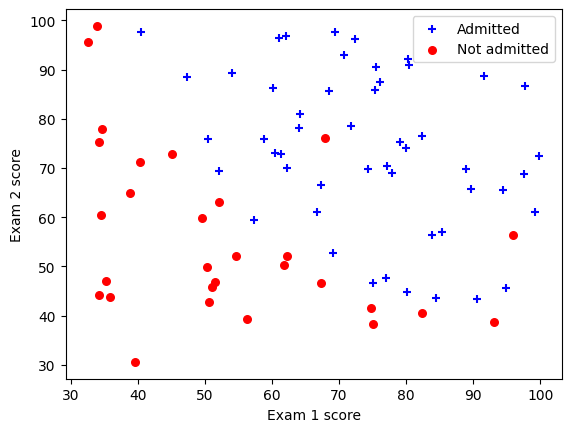

In [32]:
#Plot all the data
ax = plotData(data)
ax.legend(['Admitted', 'Not admitted'], loc='best')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')

In [33]:
# shape of the testing dataset
print('Shape of testing data :',test_data.shape)
test_data.head()

Shape of testing data : (20, 3)


,test1,test2,Admitted
0,30.0588,49.5930,0
1,44.6683,66.4501,0
2,66.5609,41.0921,0
3,49.0726,51.8832,0
4,32.7228,43.3072,0


In [34]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
test1,20.0,62.292060,19.872872,30.0588,48.620525,58.84715,76.699975,99.8279
test2,20.0,62.898735,18.264811,35.5707,45.097525,63.60980,76.568625,90.9601
Admitted,20.0,0.500000,0.512989,0.0000,0.000000,0.50000,1.000000,1.0000


In [35]:
# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Admitted'],axis=1)
test_y = test_data['Admitted']

# seperate the independent and target variable on training data
train_x = data.drop(columns=['Admitted'],axis=1)
train_y = data['Admitted']

In [36]:
#Create the object of the K-Nearest Neighbor model
KNNmodel = KNeighborsClassifier(n_neighbors=5)

In [37]:
# fit the model with the training data
KNNmodel.fit(train_x,train_y)

KNeighborsClassifier()

In [38]:
# Number of Neighbors used to predict the target
print('\nThe number of neighbors used to predict the target : ',KNNmodel.n_neighbors)


The number of neighbors used to predict the target :  5


In [39]:
# predict the target on the train dataset
predict_train = KNNmodel.predict(train_x)
print('\nTarget on train data',predict_train)


Target on train data [0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1]


In [40]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.9240506329113924


In [41]:
# predict the target on the test dataset
predict_test = KNNmodel.predict(test_x)
print('Target on test data',predict_test)


Target on test data [0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1]


In [42]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.9


In [46]:
cm = confusion_matrix(test_y, predict_test)

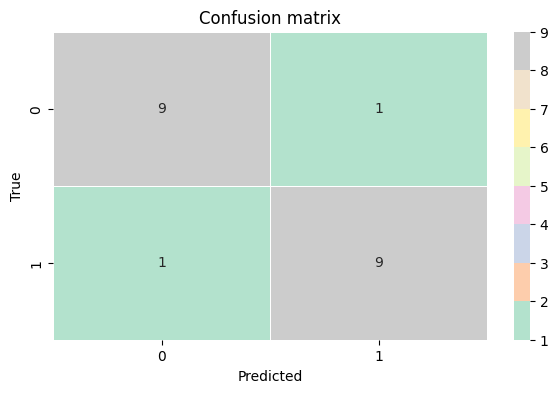

In [47]:
plt.figure(figsize=(7,4))
sns.heatmap(cm,annot=True,cmap='Pastel2',linewidths=.5)
plt.title(f"Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [48]:
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore

In [49]:
print("\nConfusion matrix: \n" + str(confusion_matrix(test_y, predict_test)))
print("\nClassification report: \n" + str(classification_report(test_y, predict_test)))


Confusion matrix: 
[[9 1]
 [1 9]]

Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



As a result, we can see that two of the results were predicted incorrectly and the remaining 18 students were predicted correctly.